In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [100]:
fileName = "circles10s_800r_2"

data = pd.read_excel("./Raw Data/"+fileName+"_Raw.xlsx")
data = data.set_axis(['timeglobal','xR','yR','thetaR','xD','yD','thetaD','xE','yE','thetaE','u1','u2','u3','u4'], axis=1, inplace=False)

#get rid of zeros at the end
dataToDrop = []
for i in range(len(data['timeglobal'])):
    if data['timeglobal'][i]==0:
        dataToDrop = np.append(dataToDrop,i)
    
data = data.drop(dataToDrop)
#print(data)

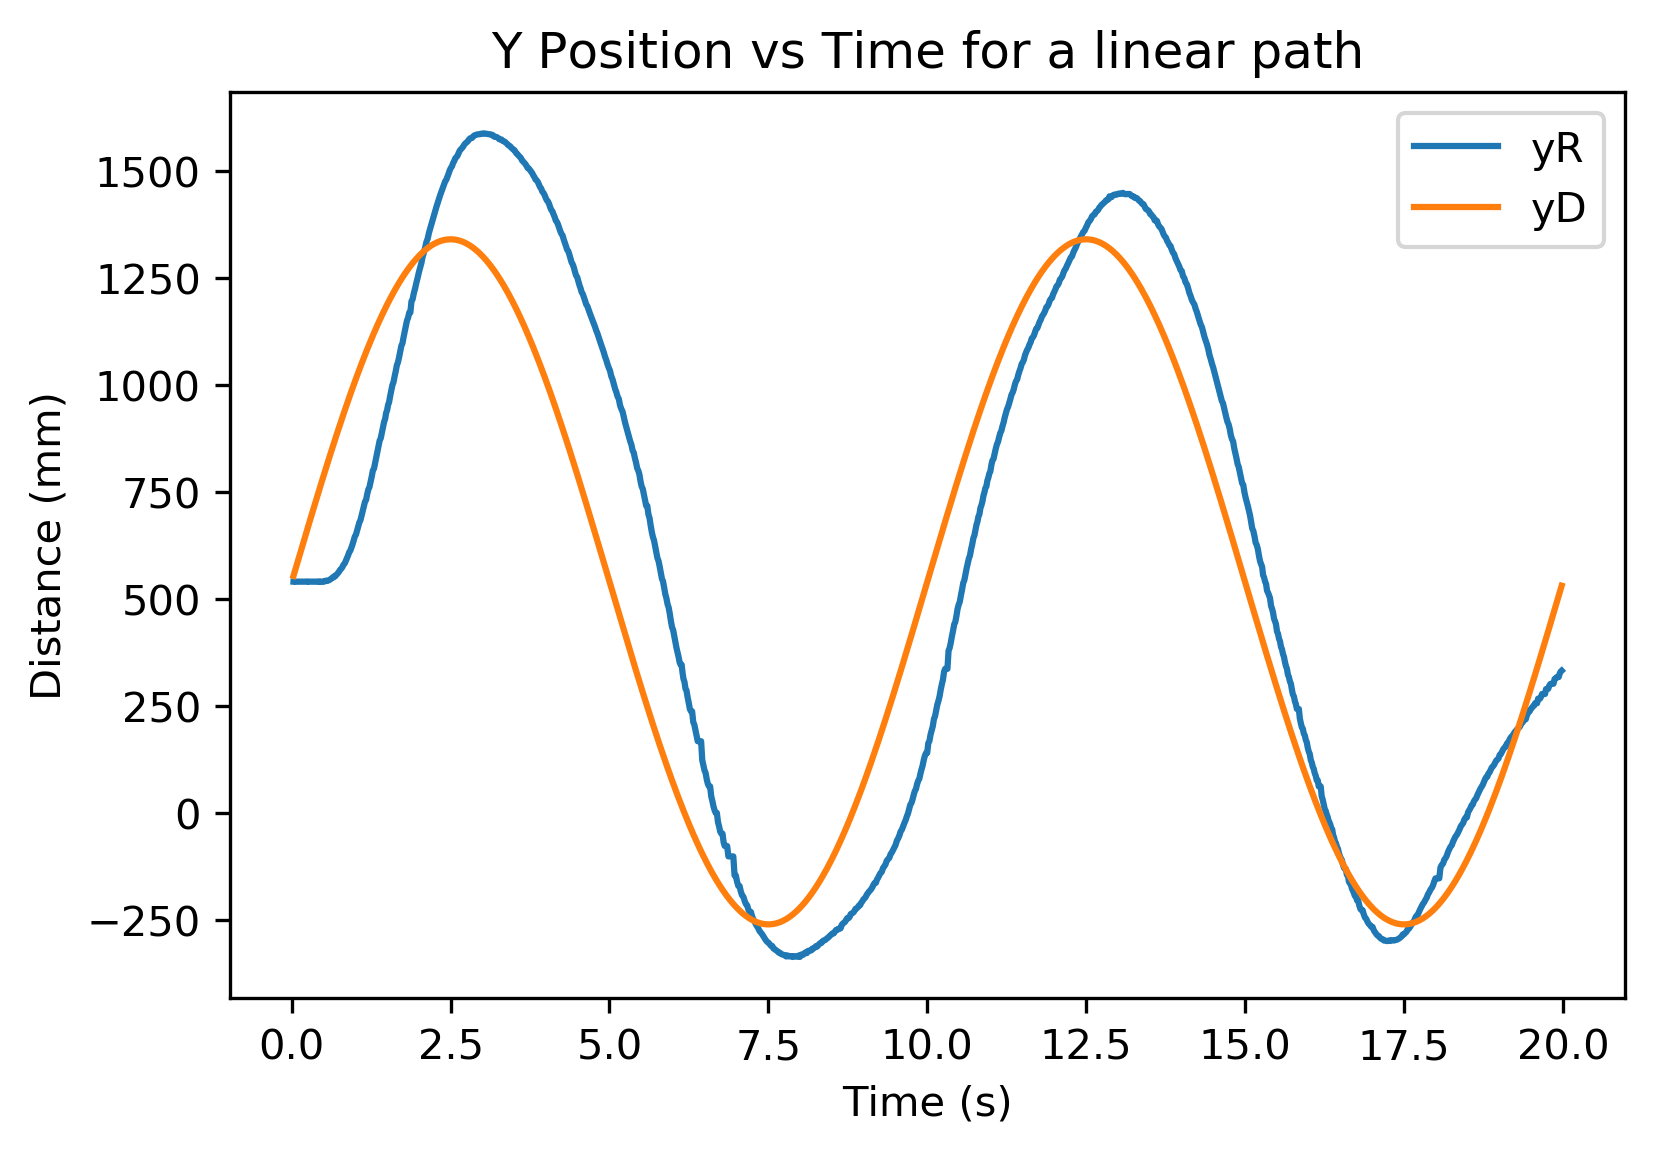

In [101]:
plt.plot(data['timeglobal'],data['yR'],data['timeglobal'],data['yD'])
plt.ylabel("Distance (mm)")
plt.xlabel("Time (s)")
plt.legend(["yR","yD"])
plt.title("Y Position vs Time for a linear path")
plt.show()

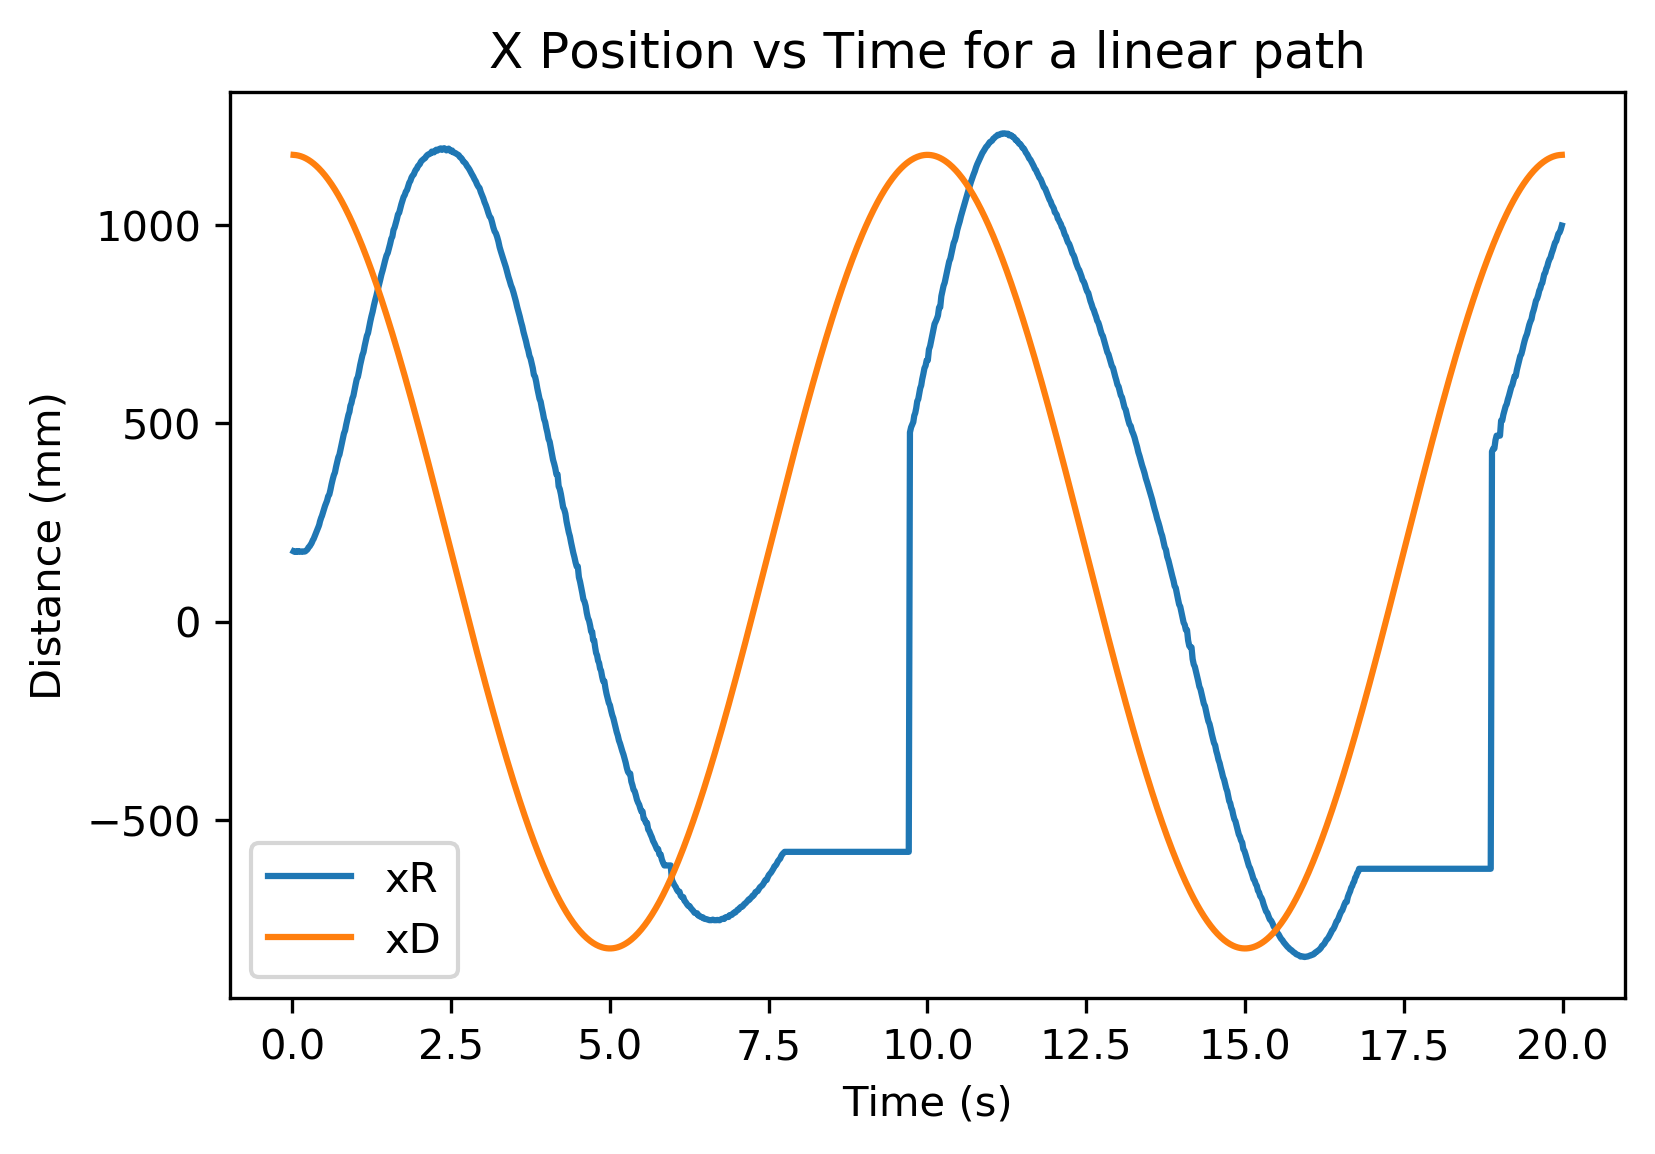

In [95]:
plt.plot(data['timeglobal'],data['xR'],data['timeglobal'],data['xD'])
plt.ylabel("Distance (mm)")
plt.xlabel("Time (s)")
plt.legend(["xR","xD"])
plt.title("X Position vs Time for a linear path")
plt.show()

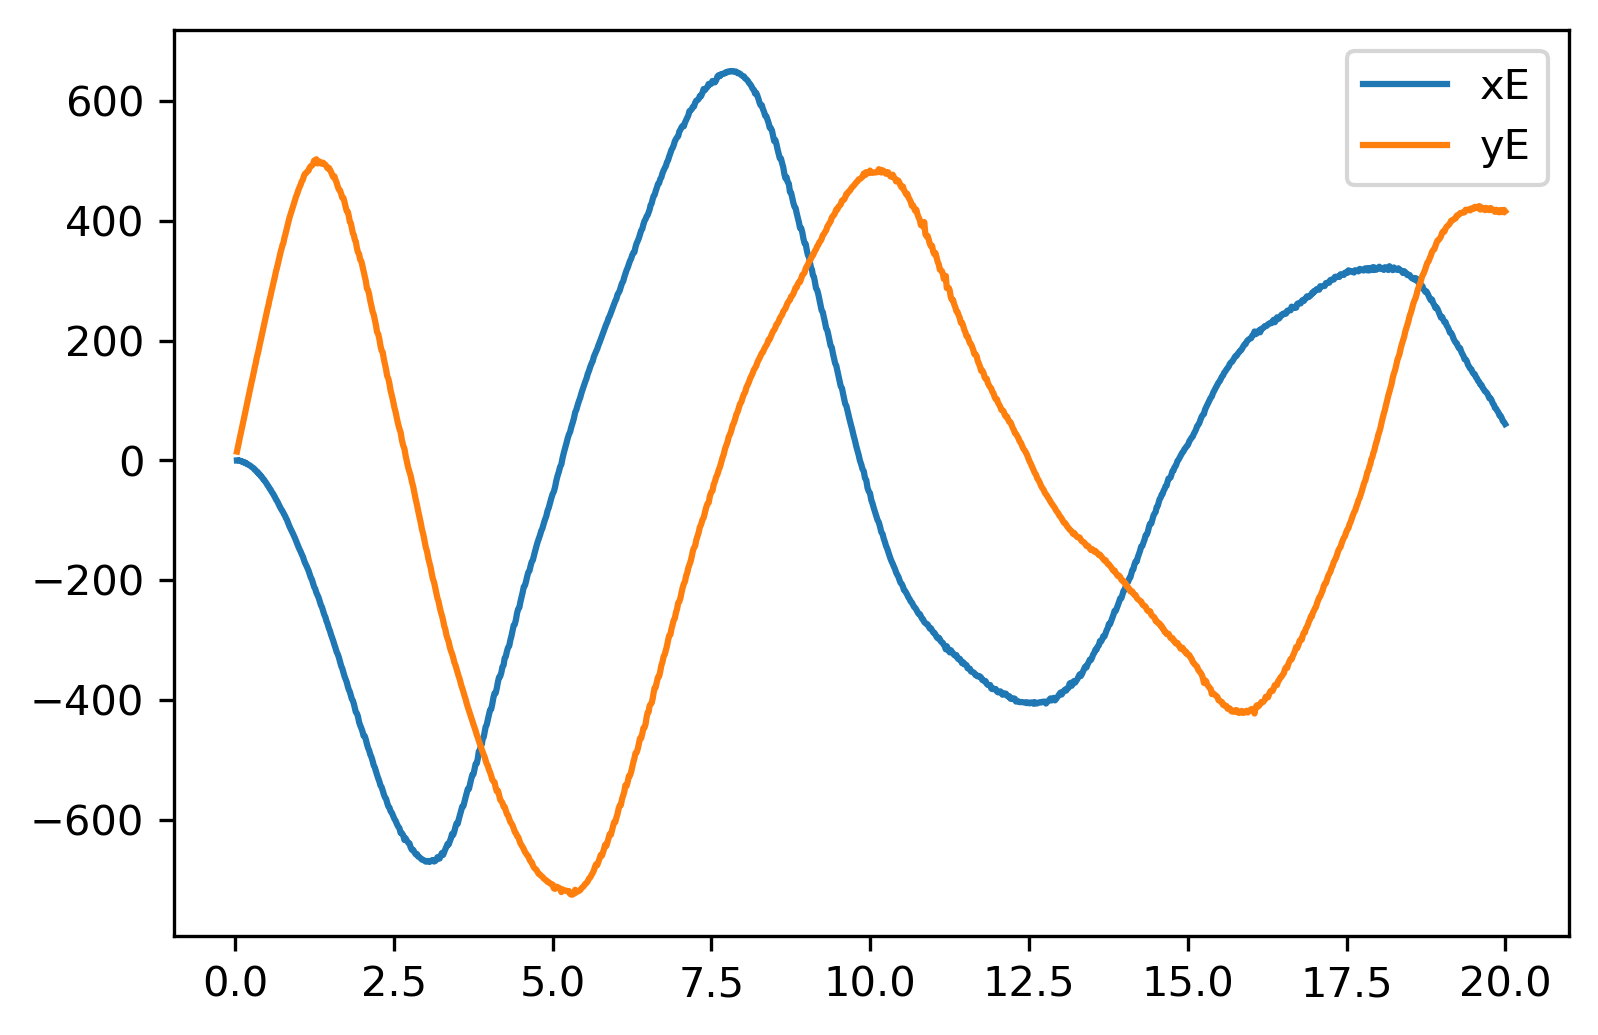

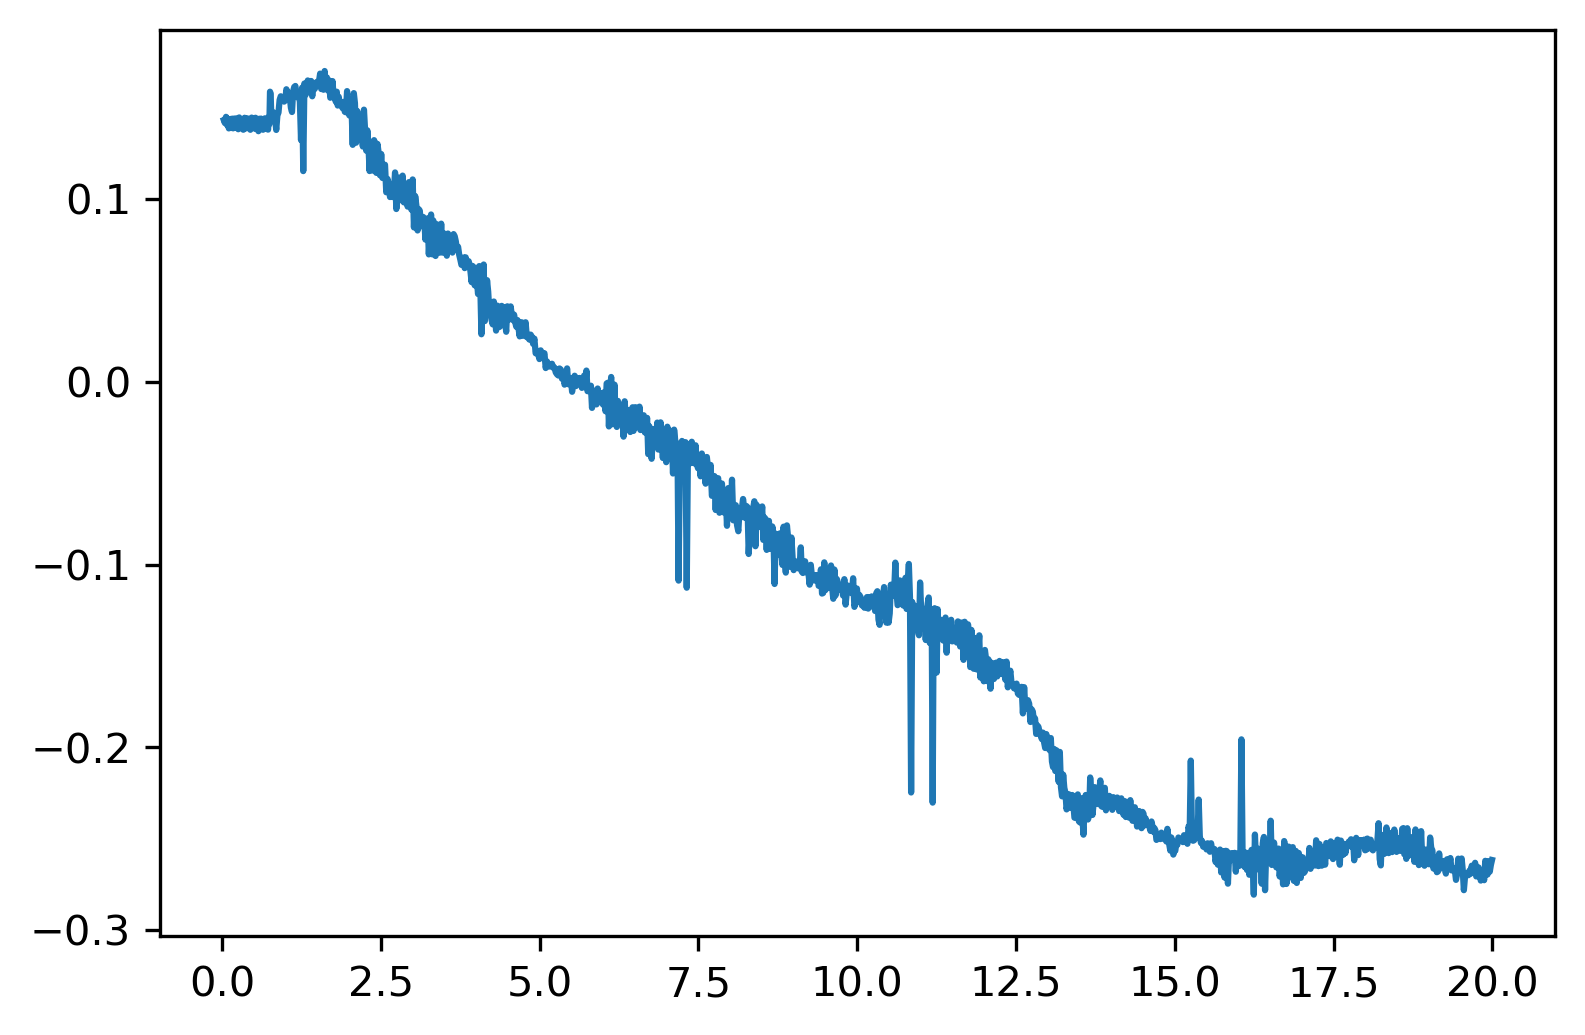

In [98]:
plt.plot(data['timeglobal'],data['xE'],data['timeglobal'],data['yE'])
plt.legend(["xE","yE"])
plt.show()

plt.plot(data['timeglobal'],data['thetaE'])
plt.show()

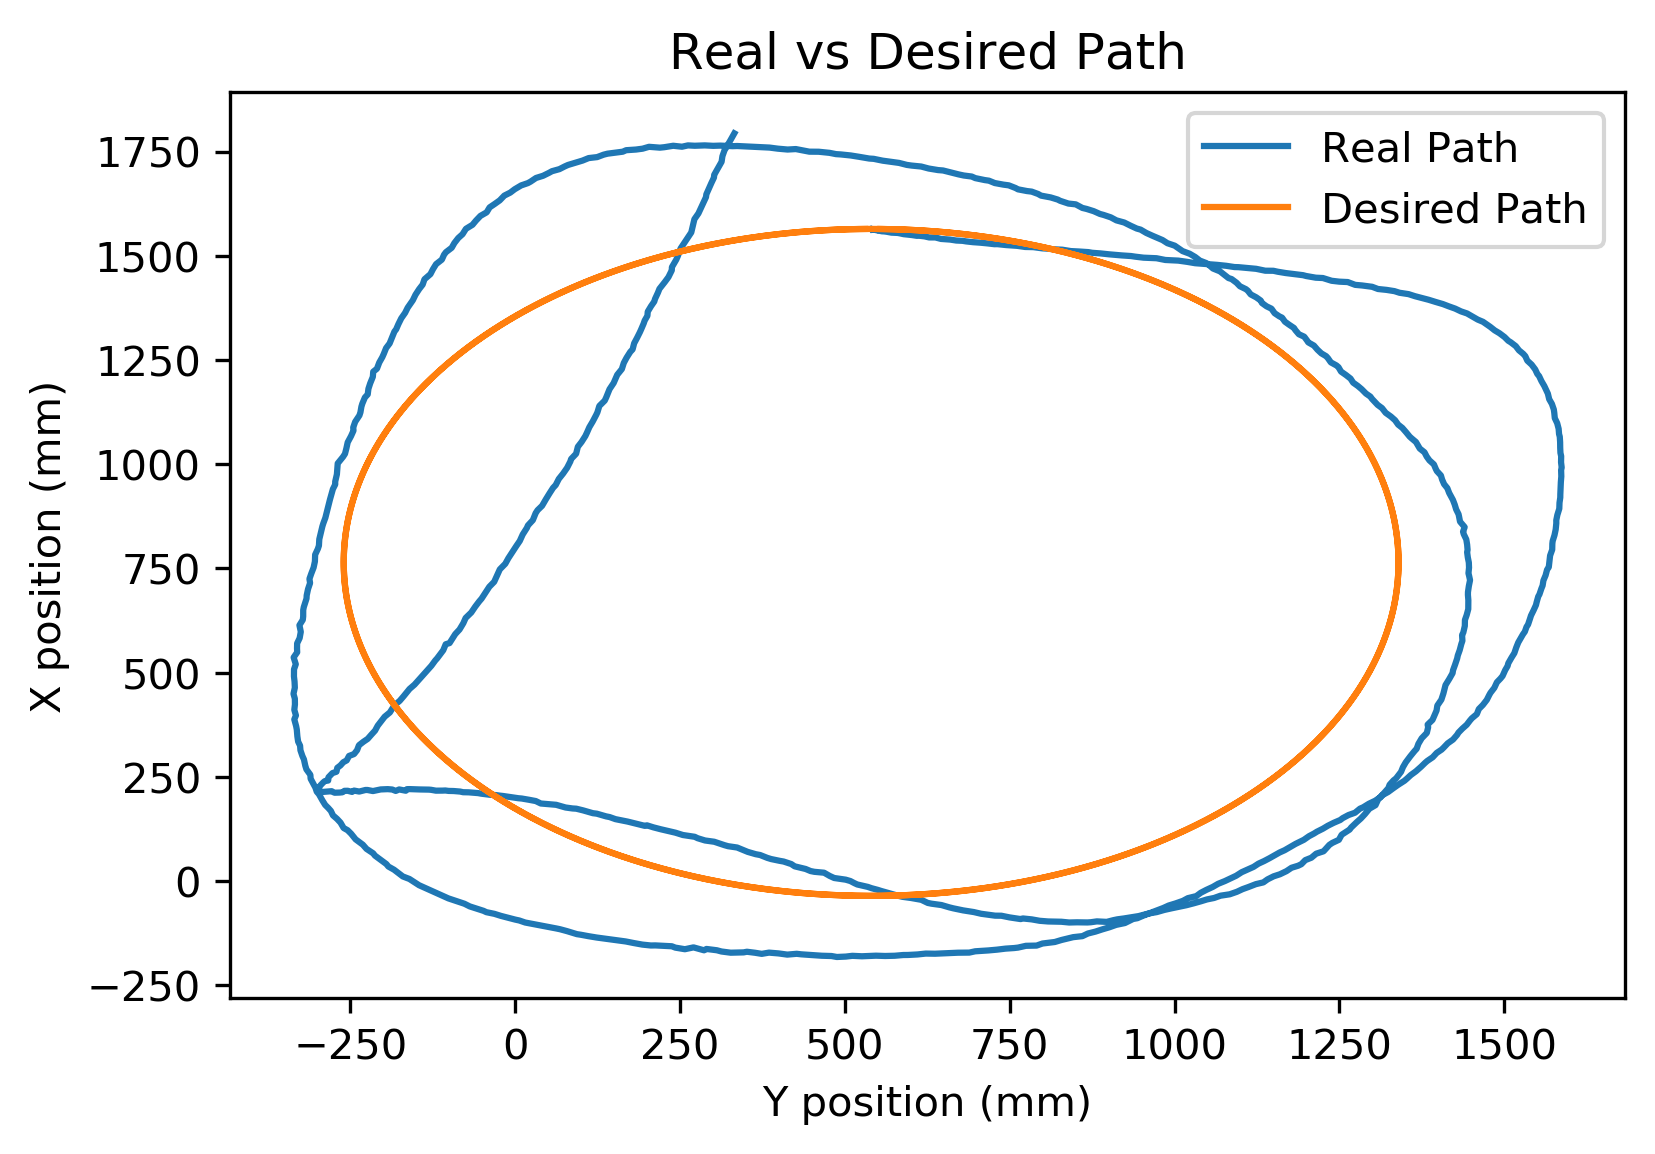

In [102]:
plt.plot(data['yR'],data['xR'],data['yD'],data['xD'])
plt.xlabel('Y position (mm)')
plt.ylabel('X position (mm)')
plt.legend(['Real Path', 'Desired Path'])
plt.title('Real vs Desired Path')
plt.show()